In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold


In [ ]:
train_data = pd.read_csv('train_data.csv')
train_data = train_data.drop(columns=['id'])
test_data = pd.read_csv('2024_test_data (2).csv')

In [ ]:
# Check for categorical columns in test_data
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns in train Data:", categorical_columns)

Categorical Columns in train Data: ['home_team_abbr', 'away_team_abbr', 'date', 'is_night_game', 'home_pitcher', 'away_pitcher', 'home_team_season', 'away_team_season']


In [ ]:
# Check for categorical columns in test_data
categorical_columns_test = test_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns in Test Data:", categorical_columns_test)

Categorical Columns in Test Data: ['home_team_abbr', 'away_team_abbr', 'is_night_game', 'home_pitcher', 'away_pitcher', 'home_team_season', 'away_team_season']


In [ ]:
# Find missing values in categorical columns
missing_values = train_data[categorical_columns].isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Print the result
print("Missing values in categorical columns:")
print(missing_values)

Missing values in categorical columns:
is_night_game       553
home_pitcher        553
away_pitcher        553
home_team_season    553
away_team_season    553
dtype: int64


In [ ]:
# Find binary categorical columns
binary_columns = [
    col for col in train_data
    if train_data[col].nunique(dropna=True) == 2
]

# Print the binary columns
print("Binary categorical columns:")
print(binary_columns)


Binary categorical columns:
['is_night_game', 'home_team_win']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = [
    'home_team_abbr', 'away_team_abbr', 'is_night_game',
    'home_pitcher', 'away_pitcher', 'home_team_season', 'away_team_season'
]

# Initialize LabelEncoder
label_encoders = {}



In [ ]:
# Apply label encoding to each column
for col in categorical_columns:
    if col in train_data.columns:
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))  # Ensure dtype is string
        label_encoders[col] = le  # Save the encoder for future use
        print(f"Label encoding applied to column: {col}")
    else:
        print(f"Column {col} not found in train_data.")



Label encoding applied to column: home_team_abbr
Label encoding applied to column: away_team_abbr
Label encoding applied to column: is_night_game
Label encoding applied to column: home_pitcher
Label encoding applied to column: away_pitcher
Label encoding applied to column: home_team_season
Label encoding applied to column: away_team_season


In [ ]:
# Apply label encoding to each column
for col in categorical_columns:
    if col in test_data.columns:
        le = LabelEncoder()
        test_data[col] = le.fit_transform(test_data[col].astype(str))  # Ensure dtype is string
        label_encoders[col] = le  # Save the encoder for future use
        print(f"Label encoding applied to column: {col}")
    else:
        print(f"Column {col} not found in train_data.")



Label encoding applied to column: home_team_abbr
Label encoding applied to column: away_team_abbr
Label encoding applied to column: is_night_game
Label encoding applied to column: home_pitcher
Label encoding applied to column: away_pitcher
Label encoding applied to column: home_team_season
Label encoding applied to column: away_team_season


In [ ]:
# Fill missing values in 'is_night_game' with True or 1
if 'is_night_game' in train_data.columns:
    train_data['is_night_game'].fillna(1, inplace=True)  # Replace with 1
    # OR
    # train_data['is_night_game'].fillna(True, inplace=True)  # Replace with True
else:
    print("'is_night_game' column not found in train_data")

# Do the same for test_data if needed
if 'is_night_game' in test_data.columns:
    test_data['is_night_game'].fillna(1, inplace=True)  # Replace with 1
    # OR
    # test_data['is_night_game'].fillna(True, inplace=True)  # Replace with True
else:
    print("'is_night_game' column not found in test_data")


<ipython-input-215-d3ae8646e78b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['is_night_game'].fillna(1, inplace=True)  # Replace with 1
<ipython-input-215-d3ae8646e78b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
train_data

,home_team_abbr,away_team_abbr,date,is_night_game,home_team_win,home_pitcher,away_pitcher,home_team_rest,away_team_rest,home_pitcher_rest,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
0,11,12,2021-05-16,0,True,321,112,1.0,1.0,15.0,...,1.133350,-0.974559,-0.900633,-1.093425,0.896974,-0.611051,-0.398111,0.949021,1.007072,0.340438
1,25,8,2019-05-04,1,False,543,579,2.0,NaN,9.0,...,-0.044641,-0.878649,-1.079528,-1.719608,0.050448,-0.851738,-0.202878,0.489511,-0.876286,1.416154
2,25,10,2019-06-10,1,True,307,686,1.0,1.0,6.0,...,-0.100180,-1.702937,-0.867762,1.992552,-0.404961,-0.132717,-0.106344,2.481020,-0.200110,-0.026083
3,0,3,2018-06-26,1,True,160,333,1.0,1.0,5.0,...,-1.385079,-1.549095,-1.008470,0.116080,-1.236753,-0.119898,0.005985,1.646317,-0.764309,NaN
4,21,1,2016-07-05,1,False,717,28,1.0,1.0,6.0,...,0.356122,0.663967,-0.123547,0.361822,-0.035276,-0.285671,-2.563819,0.527432,-0.911987,-1.109533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11062,26,13,2016-07-08,1,True,380,156,1.0,1.0,5.0,...,0.446414,0.498714,-0.016668,-0.360635,0.155712,0.054024,NaN,1.031686,0.045731,-0.175099
11063,4,26,2023-04-19,0,False,228,247,1.0,1.0,5.0,...,0.714723,-0.473958,0.793842,1.039308,1.475612,-0.929588,-0.903482,1.208667,2.000674,-1.396761
11064,2,18,2022-05-27,1,True,34,583,1.0,2.0,5.0,...,2.539210,0.307611,-1.203648,0.436108,-0.429071,-0.005314,0.091690,0.673315,-0.254586,-2.032732
11065,17,8,2021-05-19,1,False,16,584,1.0,1.0,5.0,...,0.595529,-0.715971,0.515236,1.147914,-0.038848,-0.328605,0.058396,0.807748,NaN,1.090447


In [ ]:
train_data['spread_consistency'] = train_data['home_team_spread_mean'] - train_data['away_team_spread_mean']

In [ ]:
test_data['spread_consistency'] = test_data['home_team_spread_mean'] - test_data['away_team_spread_mean']

In [ ]:
new_train_data = train_data[['home_team_abbr', 'away_team_abbr', 'is_night_game',
                             'home_pitcher', 'away_pitcher', 'home_team_season',
                             'away_team_season', 'spread_consistency', 'away_team_wins_skew',
                             'home_team_spread_mean']]


In [ ]:
new_test_data = test_data[['home_team_abbr', 'away_team_abbr', 'is_night_game',
                             'home_pitcher', 'away_pitcher', 'home_team_season',
                             'away_team_season', 'spread_consistency', 'away_team_wins_skew',
                             'home_team_spread_mean']]

In [ ]:
new_train_data = train_data[['home_team_abbr', 'away_team_abbr', 'is_night_game',
                             'home_pitcher', 'away_pitcher', 'home_team_season',
                             'away_team_season', 'spread_consistency', 'away_team_wins_skew',
                             'home_team_spread_mean']]

In [ ]:
# Calculate Win Skew Difference
new_train_data['win_skew_diff'] = train_data['home_team_wins_skew'] - train_data['away_team_wins_skew']
new_test_data['win_skew_diff'] = test_data['home_team_wins_skew'] - test_data['away_team_wins_skew']

<ipython-input-222-d1e101377b13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['win_skew_diff'] = train_data['home_team_wins_skew'] - train_data['away_team_wins_skew']
<ipython-input-222-d1e101377b13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_data['win_skew_diff'] = test_data['home_team_wins_skew'] - test_data['away_team_wins_skew']


In [ ]:
train_data['home_team_wins_skew_norm'] = (train_data['home_team_wins_skew'] - train_data['home_team_wins_skew'].min()) / \
                                         (train_data['home_team_wins_skew'].max() - train_data['home_team_wins_skew'].min())

train_data['away_team_wins_skew_norm'] = (train_data['away_team_wins_skew'] - train_data['away_team_wins_skew'].min()) / \
                                         (train_data['away_team_wins_skew'].max() - train_data['away_team_wins_skew'].min())


In [ ]:
test_data['home_team_wins_skew_norm'] = (test_data['home_team_wins_skew'] - test_data['home_team_wins_skew'].min()) / \
                                         (test_data['home_team_wins_skew'].max() - test_data['home_team_wins_skew'].min())

test_data['away_team_wins_skew_norm'] = (test_data['away_team_wins_skew'] - test_data['away_team_wins_skew'].min()) / \
                                         (test_data['away_team_wins_skew'].max() - test_data['away_team_wins_skew'].min())


In [ ]:
train_data['home_team_win_prob_simple'] = train_data['home_team_wins_skew_norm'] - train_data['away_team_wins_skew_norm']
test_data['home_team_win_prob_simple'] = test_data['home_team_wins_skew_norm'] - test_data['away_team_wins_skew_norm']

In [ ]:
new_train_data['home_team_wins_skew_norm'] = train_data['home_team_wins_skew_norm']
new_train_data['away_team_wins_skew_norm'] = train_data['away_team_wins_skew_norm']

<ipython-input-226-7e5856d9fd61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['home_team_wins_skew_norm'] = train_data['home_team_wins_skew_norm']
<ipython-input-226-7e5856d9fd61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['away_team_wins_skew_norm'] = train_data['away_team_wins_skew_norm']


In [ ]:
new_test_data['home_team_wins_skew_norm'] = test_data['home_team_wins_skew_norm']
new_test_data['away_team_wins_skew_norm'] = test_data['away_team_wins_skew_norm']

<ipython-input-227-52ecb455924e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_data['home_team_wins_skew_norm'] = test_data['home_team_wins_skew_norm']
<ipython-input-227-52ecb455924e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_data['away_team_wins_skew_norm'] = test_data['away_team_wins_skew_norm']


In [ ]:
new_train_data['home_team_win_prob_simple'] = train_data['home_team_win_prob_simple']
new_test_data['home_team_win_prob_simple'] = test_data['home_team_win_prob_simple']


<ipython-input-228-ee144a01e88b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['home_team_win_prob_simple'] = train_data['home_team_win_prob_simple']
<ipython-input-228-ee144a01e88b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_data['home_team_win_prob_simple'] = test_data['home_team_win_prob_simple']


In [ ]:
# Print list of columns in new_train_data
print(new_train_data.columns.tolist())


['home_team_abbr', 'away_team_abbr', 'is_night_game', 'home_pitcher', 'away_pitcher', 'home_team_season', 'away_team_season', 'spread_consistency', 'away_team_wins_skew', 'home_team_spread_mean', 'win_skew_diff', 'home_team_wins_skew_norm', 'away_team_wins_skew_norm', 'home_team_win_prob_simple']


In [ ]:
new_train_data['home_team_win'] = train_data['home_team_win']

<ipython-input-230-5a0d3d4747fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['home_team_win'] = train_data['home_team_win']


In [ ]:
import pandas as pd

# Assuming train_data is your DataFrame

# Calculate Home Team Performance (combining several features)
new_train_data['home_team_performance'] = (
    0.4 * new_train_data['home_team_season'] +                # Home team's season strength
    0.3 * new_train_data['spread_consistency'] +              # Spread consistency (general performance consistency)
    0.2 * new_train_data['home_team_wins_skew_norm'] +        # Skew of home team wins (measure of how consistent the wins are)
    0.1 * new_train_data['is_night_game']                     # Night game factor (impact on home team performance)
)

# Calculate Away Team Performance (similarly)
new_train_data['away_team_performance'] = (
    0.4 * new_train_data['away_team_season'] +                # Away team's season strength
    0.3 * new_train_data['spread_consistency'] +              # Spread consistency
    0.2 * new_train_data['away_team_wins_skew'] +             # Skew of away team wins
    0.1 * new_train_data['is_night_game']                     # Night game factor (impact on away team performance)
)

# Display the first few rows to check the new performance features
new_train_data[['home_team_performance', 'away_team_performance']].head()


<ipython-input-231-a1776eca9c08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['home_team_performance'] = (
<ipython-input-231-a1776eca9c08>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['away_team_performance'] = (


,home_team_performance,away_team_performance
0,74.618053,49.212529
1,34.789010,28.967177
2,34.539804,NaN
3,70.814212,20.208803
4,8.676893,75.559619


In [ ]:
# Calculate Home Team Performance (combining several features)
new_test_data['home_team_performance'] = (
    0.4 * new_train_data['home_team_season'] +                # Home team's season strength
    0.3 * new_train_data['spread_consistency'] +              # Spread consistency (general performance consistency)
    0.2 * new_train_data['home_team_wins_skew_norm'] +        # Skew of home team wins (measure of how consistent the wins are)
    0.1 * new_train_data['is_night_game']                     # Night game factor (impact on home team performance)
)

# Calculate Away Team Performance (similarly)
new_test_data['away_team_performance'] = (
    0.4 * new_train_data['away_team_season'] +                # Away team's season strength
    0.3 * new_train_data['spread_consistency'] +              # Spread consistency
    0.2 * new_train_data['away_team_wins_skew'] +             # Skew of away team wins
    0.1 * new_train_data['is_night_game']                     # Night game factor (impact on away team performance)
)

# Display the first few rows to check the new performance features
new_test_data[['home_team_performance', 'away_team_performance']].head()

<ipython-input-232-2d667e920be4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_data['home_team_performance'] = (
<ipython-input-232-2d667e920be4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_data['away_team_performance'] = (


,home_team_performance,away_team_performance
0,74.618053,49.212529
1,34.789010,28.967177
2,34.539804,NaN
3,70.814212,20.208803
4,8.676893,75.559619


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Impute numeric columns
numeric_columns = new_train_data.select_dtypes(include=[np.number]).columns
imputer = IterativeImputer(random_state=42)
new_train_data[numeric_columns] = imputer.fit_transform(new_train_data[numeric_columns])

<ipython-input-233-6dfd6dd274b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data[numeric_columns] = imputer.fit_transform(new_train_data[numeric_columns])


In [ ]:
new_test_data[numeric_columns] = imputer.transform(new_test_data[numeric_columns])

<ipython-input-234-bbf59ef2a9c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test_data[numeric_columns] = imputer.transform(new_test_data[numeric_columns])


In [ ]:
# Print list of columns in new_train_data
print(new_train_data.columns.tolist())

['home_team_abbr', 'away_team_abbr', 'is_night_game', 'home_pitcher', 'away_pitcher', 'home_team_season', 'away_team_season', 'spread_consistency', 'away_team_wins_skew', 'home_team_spread_mean', 'win_skew_diff', 'home_team_wins_skew_norm', 'away_team_wins_skew_norm', 'home_team_win_prob_simple', 'home_team_win', 'home_team_performance', 'away_team_performance']


                      Feature  Importance
7          spread_consistency    0.096643
13  home_team_win_prob_simple    0.071841
8         away_team_wins_skew    0.068504
14      home_team_performance    0.067644
4                away_pitcher    0.067009
15      away_team_performance    0.065703
1              away_team_abbr    0.064640
2               is_night_game    0.064437
0              home_team_abbr    0.064230
11   home_team_wins_skew_norm    0.063735
5            home_team_season    0.063712
9       home_team_spread_mean    0.061332
3                home_pitcher    0.060762
10              win_skew_diff    0.060120
6            away_team_season    0.059688
12   away_team_wins_skew_norm    0.000000


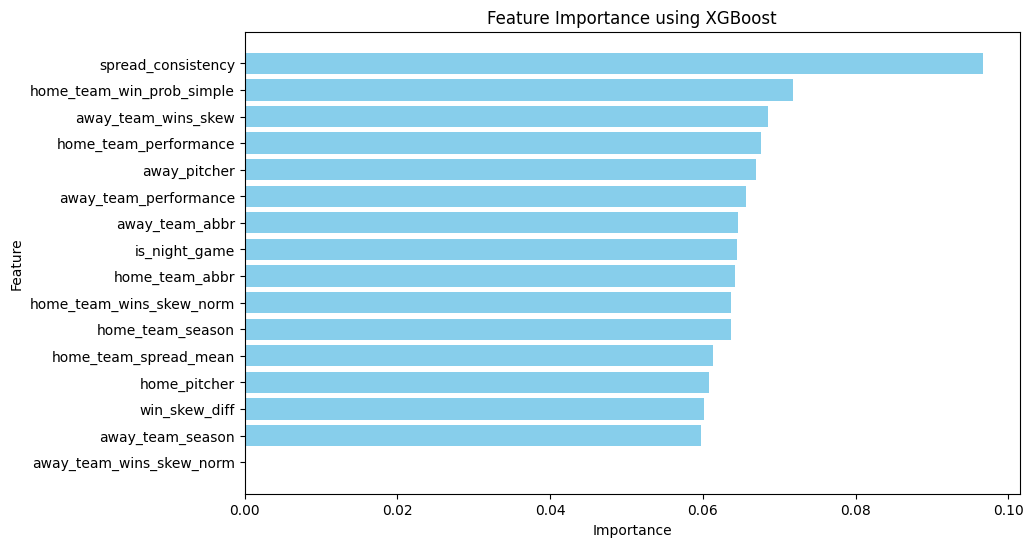

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example data setup
features = ['home_team_abbr', 'away_team_abbr', 'is_night_game', 'home_pitcher', 'away_pitcher', 'home_team_season', 'away_team_season', 'spread_consistency', 'away_team_wins_skew', 'home_team_spread_mean', 'win_skew_diff', 'home_team_wins_skew_norm', 'away_team_wins_skew_norm', 'home_team_win_prob_simple', 'home_team_performance', 'away_team_performance']
target = 'home_team_win'


# Define X and y
X = new_train_data[features]
y = new_train_data[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,
    max_depth=5,
    objective='binary:logistic',  # Binary classification
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Get feature importance
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance on top
plt.show()


In [ ]:
# List of columns to drop
columns_to_drop = [
    'away_team_wins_skew_norm'
]

# Drop the specified columns from both train and test data
new_train_data = new_train_data.drop(columns=columns_to_drop)
new_test_data = new_test_data.drop(columns=columns_to_drop)


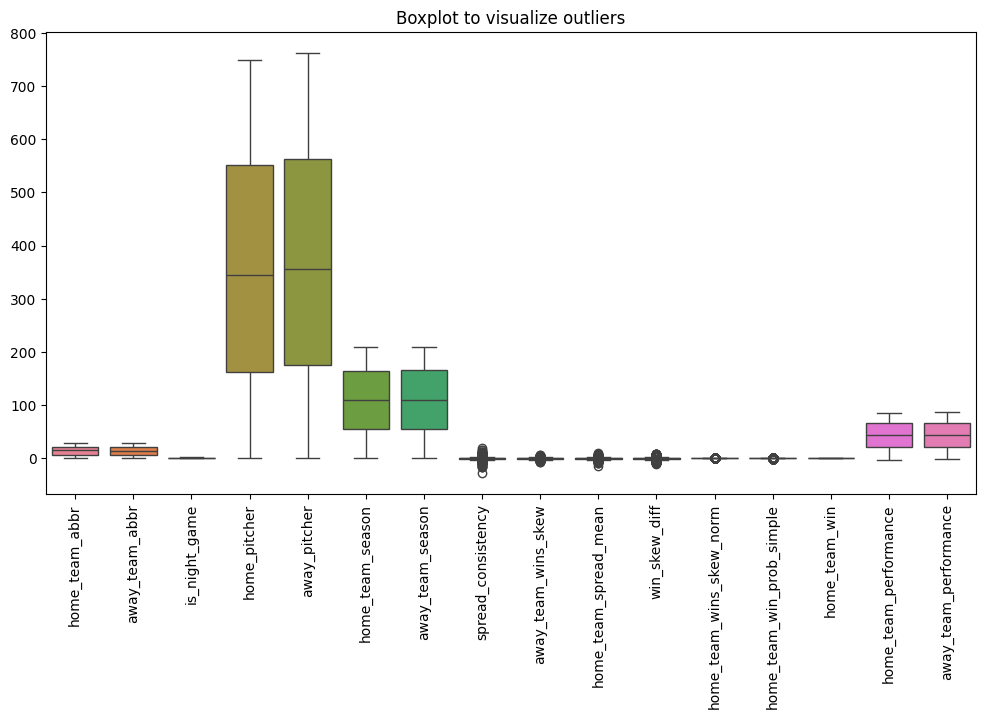

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each feature in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_train_data)
plt.title('Boxplot to visualize outliers')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Select only numeric columns (if there are any non-numeric columns)
numeric_data = new_train_data.select_dtypes(include=['float64', 'int64'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method (values outside Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))

# Remove rows with outliers
new_train_data_no_outliers = new_train_data[~outliers.any(axis=1)]


print(f"New shape without outliers: {new_train_data.shape}")


New shape without outliers: (11067, 16)


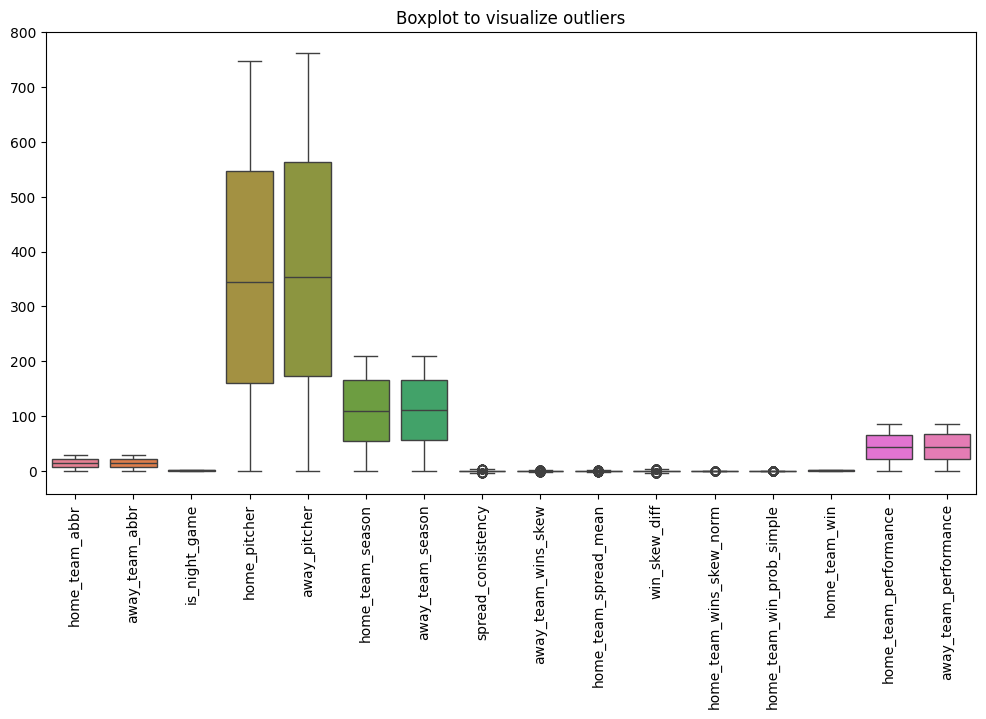

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each feature in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_train_data_no_outliers)
plt.title('Boxplot to visualize outliers')
plt.xticks(rotation=90)
plt.show()

In [ ]:
new_train_data=new_train_data.drop(columns=['home_pitcher','away_pitcher'])

In [ ]:
new_test_data=new_test_data.drop(columns=['home_pitcher','away_pitcher'])

In [ ]:
new_train_data['home_team_win'].value_counts(normalize=True)


,proportion
home_team_win,
True,0.531038
False,0.468962


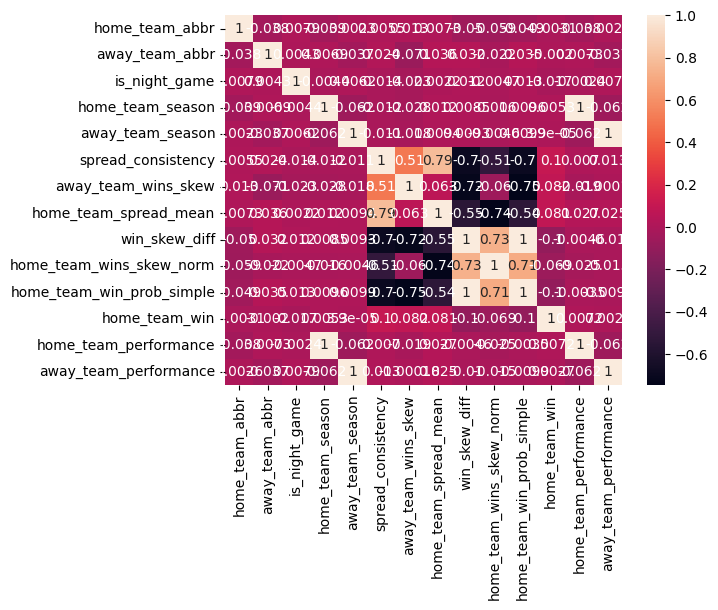

In [ ]:
correlation_matrix = new_train_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
correlation_matrix

,home_team_abbr,away_team_abbr,is_night_game,home_team_season,away_team_season,spread_consistency,away_team_wins_skew,home_team_spread_mean,win_skew_diff,home_team_wins_skew_norm,home_team_win_prob_simple,home_team_win,home_team_performance,away_team_performance
home_team_abbr,1.000000,-0.037961,0.007934,-0.038570,0.002337,0.005479,0.013456,0.007298,-0.050098,-0.058998,-0.048906,-0.003059,-0.038487,0.002574
away_team_abbr,-0.037961,1.000000,0.004271,0.006856,-0.036942,0.023853,-0.070553,0.036135,0.032445,-0.022406,0.034835,-0.001962,0.007319,-0.037055
is_night_game,0.007934,0.004271,1.000000,-0.004353,0.006217,-0.013903,-0.022885,0.002242,0.012253,-0.004712,0.012964,-0.016917,-0.002445,0.007938
home_team_season,-0.038570,0.006856,-0.004353,1.000000,-0.061623,-0.012282,-0.028379,0.012191,0.008495,-0.015568,0.009627,0.005310,0.999812,-0.062113
away_team_season,0.002337,-0.036942,0.006217,-0.061623,1.000000,-0.010631,-0.018421,0.009374,0.009306,-0.004648,0.009899,0.000039,-0.061826,0.999688
spread_consistency,0.005479,0.023853,-0.013903,-0.012282,-0.010631,1.000000,0.506098,0.786280,-0.695276,-0.507671,-0.695073,0.102031,0.006968,0.013189
away_team_wins_skew,0.013456,-0.070553,-0.022885,-0.028379,-0.018421,0.506098,1.000000,0.063203,-0.721524,-0.059798,-0.745585,0.082187,-0.018542,-0.000185
home_team_spread_mean,0.007298,0.036135,0.002242,0.012191,0.009374,0.786280,0.063203,1.000000,-0.553896,-0.737778,-0.536351,0.080715,0.027133,0.025336
win_skew_diff,-0.050098,0.032445,0.012253,0.008495,0.009306,-0.695276,-0.721524,-0.553896,1.000000,0.734280,0.999373,-0.103436,-0.004631,-0.010339
home_team_wins_skew_norm,-0.058998,-0.022406,-0.004712,-0.015568,-0.004648,-0.507671,-0.059798,-0.737778,0.734280,1.000000,0.709788,-0.068712,-0.024876,-0.015120


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the threshold for correlation
threshold = 0.7

# Find correlated features
corr_matrix = new_train_data.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]  # getting the name of the column
            correlated_features.add(colname)

# Drop the correlated features
new_train_data = new_train_data.drop(columns=correlated_features)
new_test_data = new_test_data.drop(columns=correlated_features)

In [ ]:
new_train_data

,home_team_abbr,away_team_abbr,is_night_game,home_team_season,away_team_season,spread_consistency,away_team_wins_skew,home_team_win
0,11.0,12.0,0.0,186.0,123.0,0.390285,-0.522780,True
1,25.0,8.0,1.0,87.0,73.0,-0.738437,-0.556458,False
2,25.0,10.0,1.0,87.0,94.0,-1.568677,0.005483,True
3,0.0,3.0,1.0,177.0,51.0,-0.624465,-0.519286,True
4,21.0,1.0,1.0,21.0,189.0,0.258873,-1.090214,False
...,...,...,...,...,...,...,...,...
11062,26.0,13.0,1.0,147.0,28.0,-0.765470,-1.019380,True
11063,4.0,26.0,0.0,62.0,153.0,-2.450100,-1.013060,False
11064,2.0,18.0,1.0,47.0,173.0,-1.658334,-0.516524,True
11065,17.0,8.0,1.0,137.0,74.0,-1.339085,-0.638653,False


In [ ]:
new_train_data = new_train_data.sample(frac=0.8, random_state=42)

In [ ]:
y_train = new_train_data['home_team_win'] #target cloumn
X_train = new_train_data.drop(columns=['home_team_win']) # Drop the target column
X_test = new_test_data

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameters grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost classifier
xgb_model_tune = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(xgb_model_tune, param_grid, cv=3, scoring='accuracy', verbose=1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters for XGBoost: {best_params}')

# Predict and evaluate the tuned model
y_pred_tune_xg = grid_search.best_estimator_.predict(X_test)

submission = pd.DataFrame({
    'id': test_data['id'],  # Ensure the 'id' column exists in the original test data
    'home_team_win': y_pred_tune_xg
})

# Save to CSV
submission.to_csv('submission2.16_stage_2.csv', index=False)
print("Submission file 'submission.csv' created.")



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Submission file 'submission.csv' created.
